<a href="https://colab.research.google.com/github/klo2/Article-Details-Transition-Example/blob/master/notebooks/getting-started.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Getting Started with Vanna
This notebook shows how to use Vanna to ask questions from a database using sample data

# Install and Import Vanna

In [3]:
%pip install vanna



In [4]:
import vanna as vn

# Log In to Vanna
Vanna provides a function to get an API key. You'll get a code sent to your e-mail.
You can save your API key for future usage so that you don't have to log in every time.

In [5]:
api_key = vn.get_api_key('claude_leulliette@yahoo.fr') # Put your email here
vn.set_api_key(api_key)

Check your email for the code and enter it here: AVPRMA


# Set Model
`chinook` is a public model that refers to the [Chinook sample database](https://www.sqlitetutorial.net/sqlite-sample-database/)

In [6]:
vn.set_model('chinook')

# Connect to the Database
Here we're connecting to a SQLite database but you can connect to [any database that you have a Python driver for](databases.html)

In [7]:
vn.connect_to_sqlite('https://github.com/lerocha/chinook-database/raw/master/ChinookDatabase/DataSources/Chinook_Sqlite.sqlite')

# Ask Questions
Now we're going to use `vn.ask` to ask questions and it'll generate SQL, run the SQL, show the table, and generate a chart

In [8]:
vn.ask("What are the top 5 artists by sales?")

SELECT a.name,
       sum(il.quantity) as totalsales
FROM   artist a
    INNER JOIN album al
        ON a.artistid = al.artistid
    INNER JOIN track t
        ON al.albumid = t.albumid
    INNER JOIN invoiceline il
        ON t.trackid = il.trackid
GROUP BY a.name
ORDER BY totalsales desc limit 5;


Name  totalsales
0              Iron Maiden         140
1                       U2         107
2                Metallica          91
3             Led Zeppelin          87
4  Os Paralamas Do Sucesso          45

AI-generated follow-up questions:

* What is the total sales for each individual album?
* Which genre has the highest total sales?
* Who are the top-selling artists by genre?
* What is the average sales per artist?
* Which album has the highest number of tracks sold?
* What is the average unit price of tracks sold?
* How does the sales distribution vary across different countries?
* Are there any specific tracks that have significantly higher sales compared to others?
* Which artist has the highest average sales per album?
* How do the sales vary over different time periods (e.g., months, years)?
* Are there any notable trends or patterns in the sales data?
* Which customer has made the highest number of purchases?
* What is the total revenue generated from each genre?
* How does the sales performance of different artists compare over time?
* Are there any specific tracks or albums that have consistently high sales over time?
* How do the sales of physical albums compare to digital tracks?
* Has there been any change in sales trends over the years?
* What is the average sales per customer?
* Are there any correlations between the length of a track and its sales?
* How does the sales performance of different albums vary based on their release date?


SELECT strftime('%Y', invoicedate) as year,
       sum(total) as total_sales
FROM   invoice
GROUP BY year;


year  total_sales
0  2009       449.46
1  2010       481.45
2  2011       469.58
3  2012       477.53
4  2013       450.58

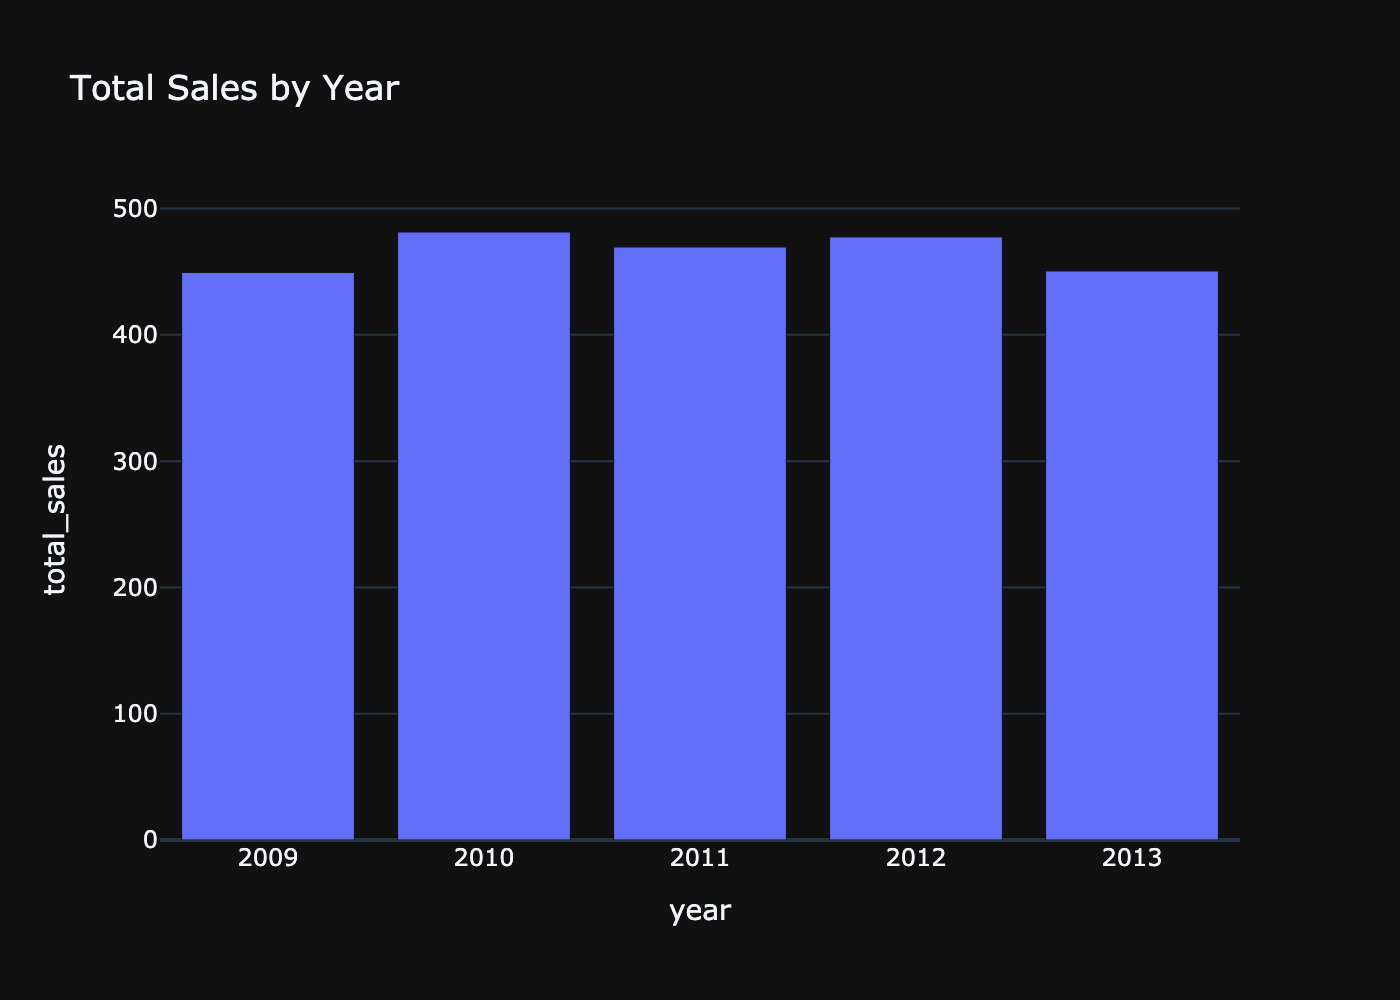

AI-generated follow-up questions:

* - What were the total sales by genre?
* - Who were the top selling artists?
* - What were the top selling albums?
* - What were the total sales by country?
* - What were the total sales by customer?
* - What were the total sales by employee?


In [ ]:
vn.ask("What were the total sales by year?")

SELECT g.name,
       sum(il.quantity) as total_sales
FROM   genre g
    INNER JOIN track t
        ON g.genreid = t.genreid
    INNER JOIN invoiceline il
        ON t.trackid = il.trackid
GROUP BY g.name
ORDER BY total_sales desc limit 5;


Name  total_sales
0                Rock          835
1               Latin          386
2               Metal          264
3  Alternative & Punk          244
4                Jazz           80

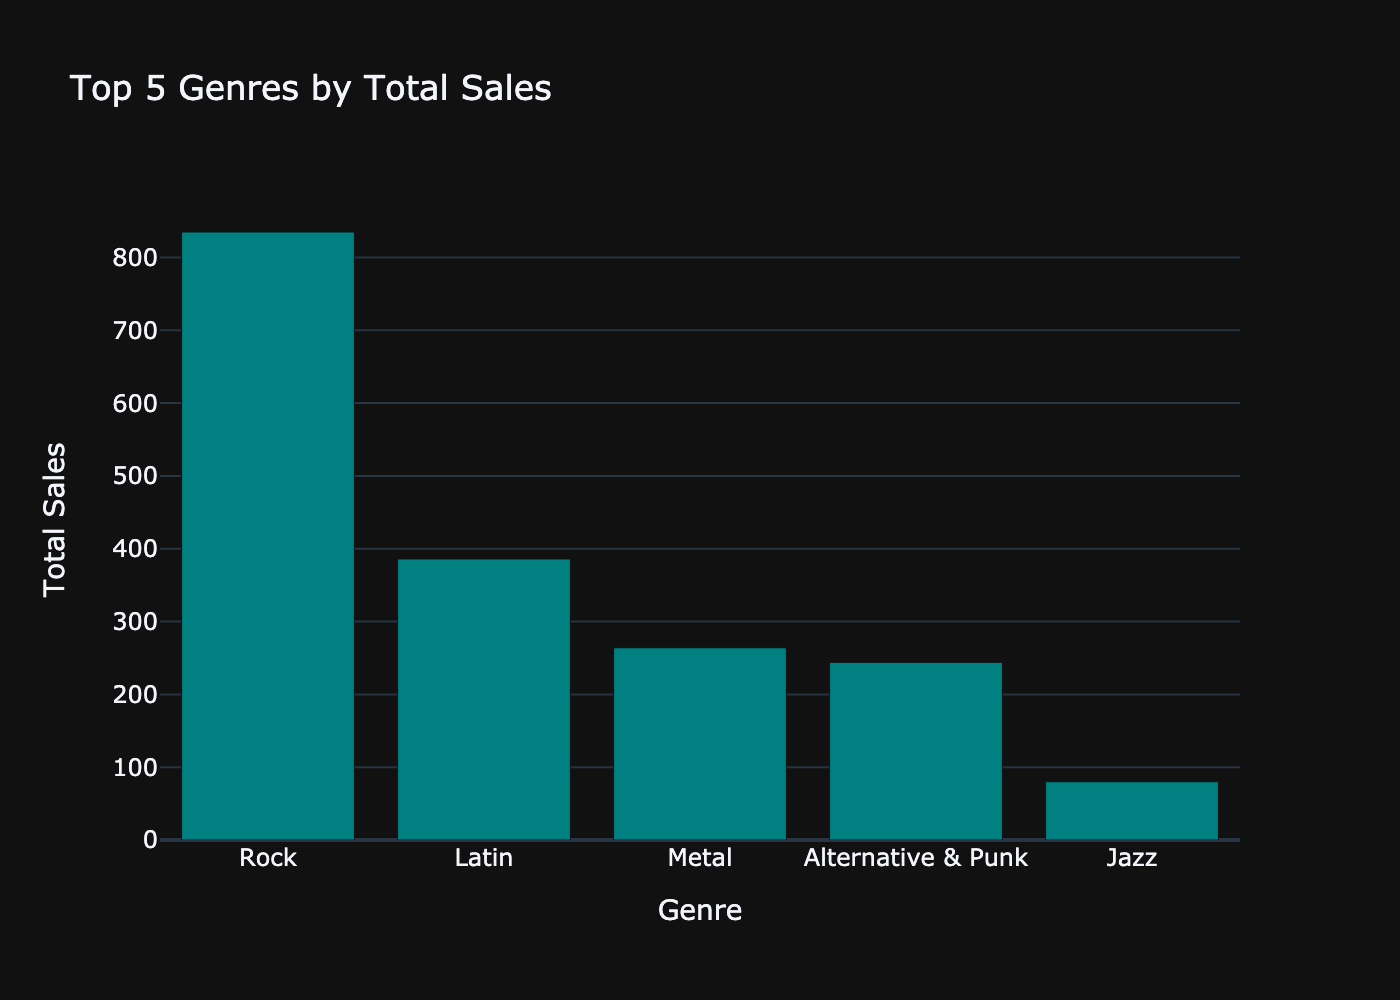

AI-generated follow-up questions:

* What are the total sales for each genre?
* Who are the top 5 artists by total sales?
* What are the sales trends by year?
* How many albums are in the database?
* What is the total number of sales?


In [ ]:
vn.ask("What are the top 5 genres by total sales?")

# Now try your own question

For reference, these are the tables in the database

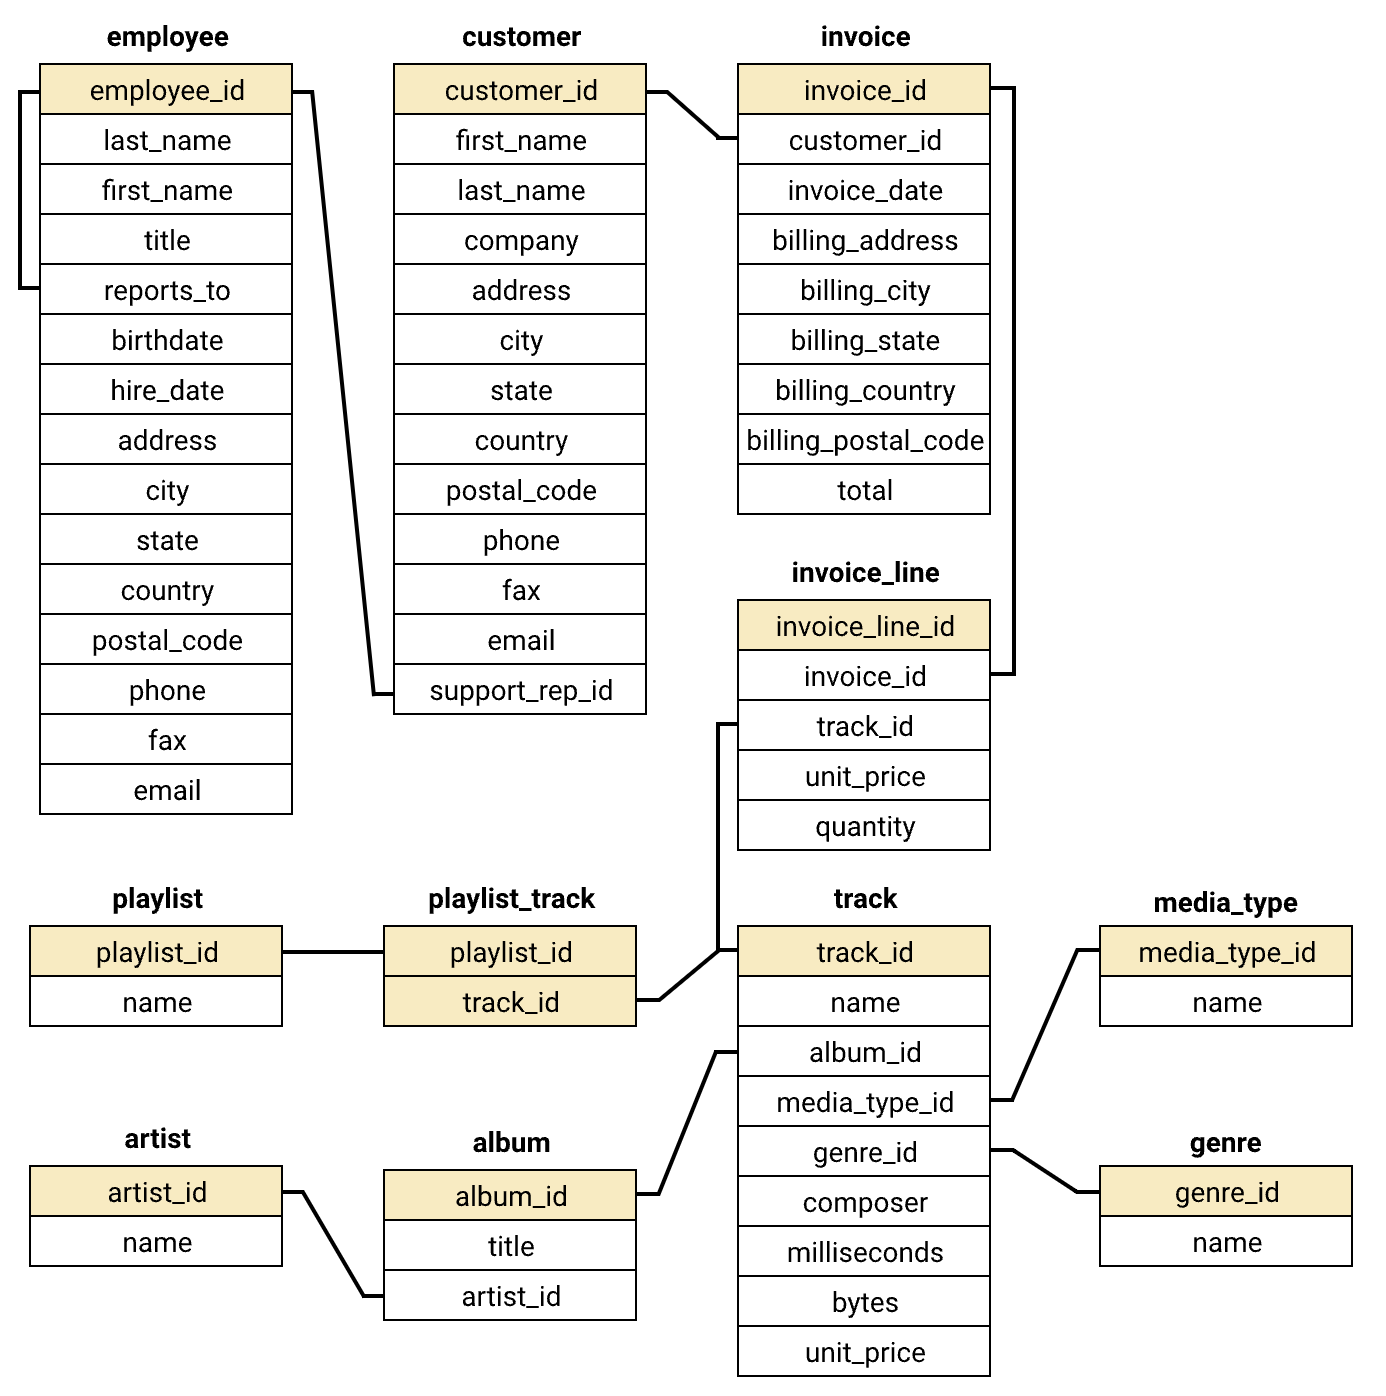

In [ ]:
# Put your question here:
vn.ask()